# Imports

In [32]:
!pip install antropy

In [33]:
import pandas as pd
import numpy as np
import antropy as ant
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from sklearn import preprocessing
import os

# Carga datos

In [54]:
s_05_03 = pd.read_csv('dataset/data/sub_05/rec_3.csv')
s_05_03.head()

Index(['pelvis_x', 'pelvis_y', 'pelvis_z', 'L5_x', 'L5_y', 'L5_z', 'L3_x',
       'L3_y', 'L3_z', 'T12_x', 'T12_y', 'T12_z', 'T8_x', 'T8_y', 'T8_z',
       'neck_x', 'neck_y', 'neck_z', 'head_x', 'head_y', 'head_z',
       'shoulderRight_x', 'shoulderRight_y', 'shoulderRight_z',
       'upperArmRight_x', 'upperArmRight_y', 'upperArmRight_z',
       'forearmRight_x', 'forearmRight_y', 'forearmRight_z', 'handRight_x',
       'handRight_y', 'handRight_z', 'shoulderLeft_x', 'shoulderLeft_y',
       'shoulderLeft_z', 'upperArmLeft_x', 'upperArmLeft_y', 'upperArmLeft_z',
       'forearmLeft_x', 'forearmLeft_y', 'forearmLeft_z', 'handLeft_x',
       'handLeft_y', 'handLeft_z', 'upperLegRight_x', 'upperLegRight_y',
       'upperLegRight_z', 'lowerLegRight_x', 'lowerLegRight_y',
       'lowerLegRight_z', 'footRight_x', 'footRight_y', 'footRight_z',
       'toeRight_x', 'toeRight_y', 'toeRight_z', 'upperLegLeft_x',
       'upperLegLeft_y', 'upperLegLeft_z', 'lowerLegLeft_x', 'lowerLegLeft_y',
  

# Corelación entre datos

## Visualizar correlaciones

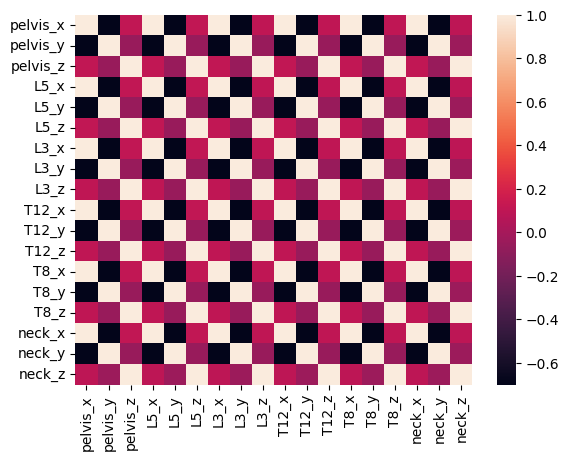

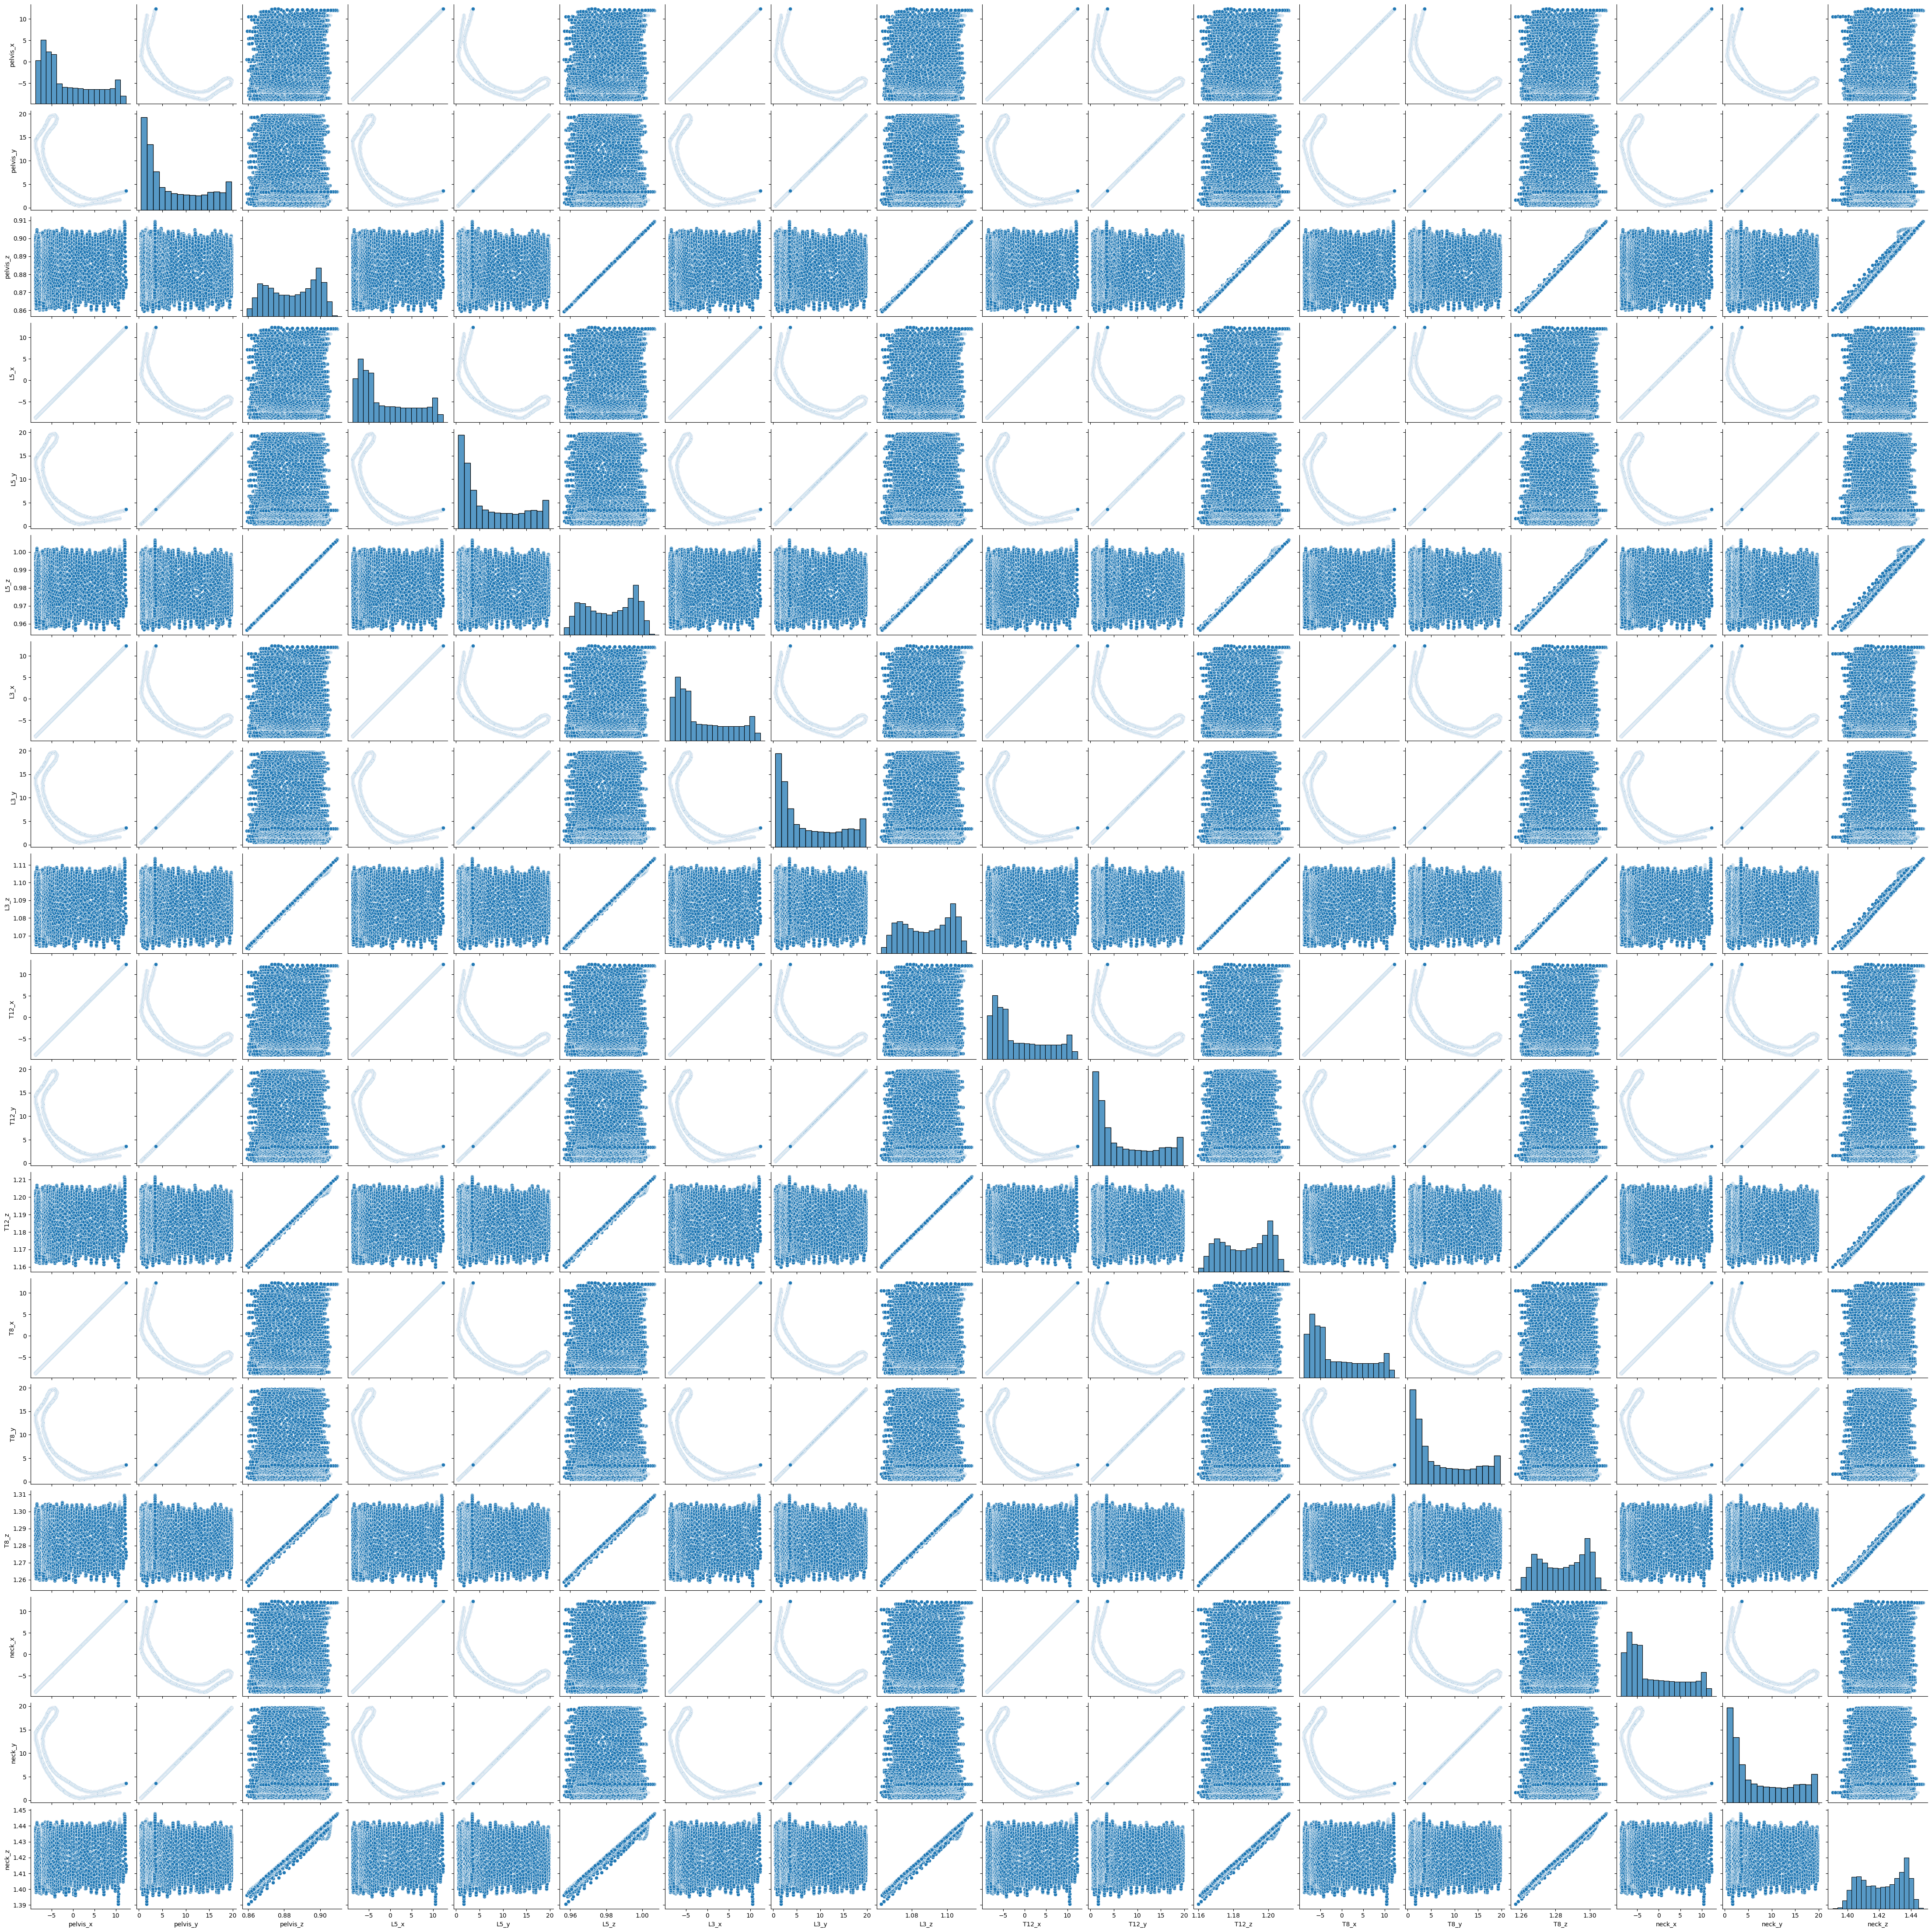

In [ ]:
corrs = s_05_03[s_05_03.columns[:18]].corr()
datos = s_05_03.iloc[:, :18]
sns.heatmap(corrs)
sns.pairplot(s_05_03[s_05_03.columns[:18]])

## Restar la posición de la pelvis

In [7]:
resta = s_05_03.copy()
for i in range(3):
  resta.iloc[:,3+i:3]-= s_05_03.iloc[:,i:i+1].to_numpy()
resta.shape

(4089, 72)

# Visualizar

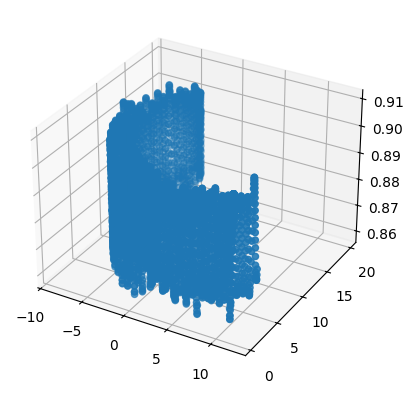

In [ ]:
def visualizar(datos):
  fig = px.scatter_3d(
    datos, x='pelvis_x', y='pelvis_y', z='pelvis_z'
  )
  fig.update_traces(marker=dict(size=2), selector=dict(mode='markers'))
  fig.show()
def visualizar_animado(x,y,z):
  fig = go.Figure(
    data=[go.Scatter3d(x=[], y=[], z=[],
                     mode="markers",marker=dict(color="red", size=2))])
  fig.update_layout(
         scene = dict(
        xaxis=dict(range=[min(x), max(x)], autorange=False),
        yaxis=dict(range=[min(y), max(y)], autorange=False),
        zaxis=dict(range=[min(z), max(z)], autorange=False),
        )),
  frames = [go.Frame(data= [go.Scatter3d(
                                       x=x[[k]],
                                       y=y[[k]],
                                       z=z[[k]])],

                   traces= [0],
                   name=f'frame{k}'
                  )for k  in  range(len(x))]
  fig.update(frames=frames),

  fig.update_layout(updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None, dict(frame=dict(redraw=True,fromcurrent=True, mode='immediate'))])])])
  fig.show()
def visualizar2d(datos):
  fig = px.scatter(datos,x=0, y=1, labels={'0': 'pelvis_x', '1': 'pelvis_y'})
  fig.update_traces(marker=dict(size=2),
              selector=dict(mode='markers'))
  fig.show()
def matplote(datosx, datosy,datosz):
  fig = plt.figure()
  ax = plt.axes(projection ='3d')
  ax.scatter3D(datosx,datosy, datosz)
  plt.show
datos = [resta["pelvis_x"],resta["pelvis_y"],resta["pelvis_z"]]
#datos = np.array(datos)
matplote(resta["pelvis_x"],resta["pelvis_y"],resta["pelvis_z"])
visualizar(resta)
visualizar_animado(resta["pelvis_x"],resta["pelvis_y"],resta["pelvis_z"])
#visualizar2d([resta["pelvis_x"],resta["pelvis_y"]])



# Normalización
Normalización de los puntos

In [8]:
stnd_scaler = preprocessing.StandardScaler()
df_stnd = stnd_scaler.fit_transform(resta)

min_max_scaler = preprocessing.MinMaxScaler()
df_minmax = min_max_scaler.fit_transform(resta)


# Ventaneo
Dividir los datos en fragmentos de 4 segundos

In [16]:
freq =60
segundos =4
ventana = freq*segundos
ventanal = []
for i in range (0, len(resta)- ventana+1, ventana):
  ventanal.append(resta.iloc[i:i+ventana])
ventanal = np.array(ventanal)
ventanal.shape

(17, 240, 72)

# Extracción de características

## Media

In [53]:
medias = ventanal.mean(axis=1)
medias.shape

(17, 72)

## Desviación típica

In [50]:
desviaciones = ventanal.std(axis=1)
desviaciones.shape

(17, 72)

## Mínimo y máximo

### Mínimo

In [25]:
minimos = ventanal.min(axis = 1)
minimos.shape

(17, 72)

### Máximo

In [40]:
maximos = ventanal.max(axis = 1)
maximos.shape

(17, 72)

## Energía de la señal

In [35]:
ventanalcuadrado = ventanal ** 2
energia = ventanalcuadrado.sum(axis = 1)
energia.shape

(17, 72)

## Parámetros de Hjorth

In [49]:
mobility, complexity = ant.hjorth_params(ventanal, 1)
activity = ventanal.var(axis =1)
activity.shape
mobility.shape
complexity.shape

(17, 72)

# Juntar las características

In [ ]:
nombres =

#  Elección de algoritmo

# Interpretación de resultados

# Cosas restantes


*   Juntar los arrays de caracteristicas al final tiene que quedar un dataframe con columnas (los nombres tienen que ser nombre de la columna y e tipo de caracteristica) de (17,72* caracteristicas a añadir)

